# __Рекомендация музыки__

**Импортируем библиотеки:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(['ggplot'])

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
import statsmodels as sts
import statistics
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
import datetime
import math

### __1. Exploratory data analysis__

**Посмотрим на наши данные:**

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


**Гистограмма встречаемости различных длин историй в тренировочном датасете.**

По горизонтали задана длина истории, а по вертикали - количество пользователей с данной длиной истории.

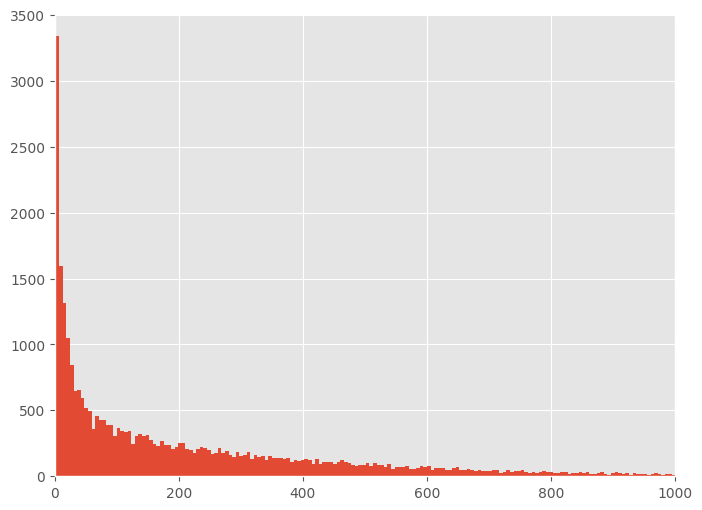

In [62]:
plt.figure(figsize=(8, 6), dpi=100)
msno_count_train = df_train['msno'].value_counts()
plt.hist(msno_count_train, bins = 1000)
plt.xlim(right=1000)
plt.xlim(left=0)
plt.show()

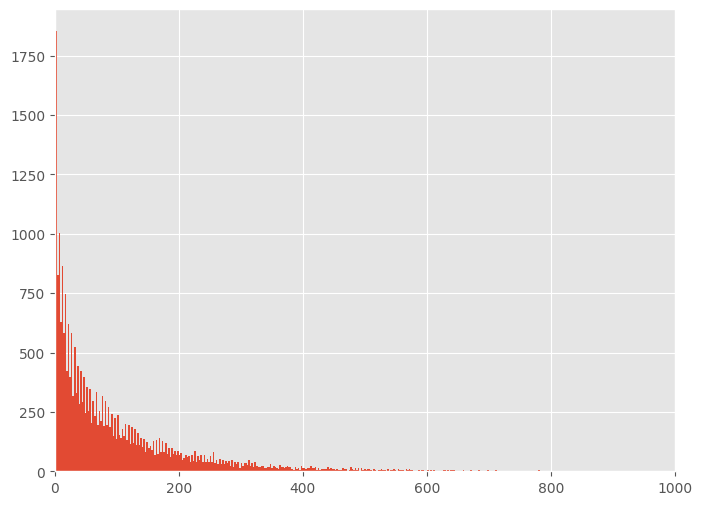

In [108]:
plt.figure(figsize=(8, 6), dpi=100)
msno_count_test = df_test['msno'].value_counts()
plt.hist(msno_count_test, bins = 1000)
plt.xlim(right=1000)
plt.xlim(left=0)
plt.show()

**Посмотрим на пользователей с самой длинной историей:**

In [72]:
print(msno_count_train[:10])

MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    5819
o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    5537
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    5511
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    4217
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    4008
hYJpPvGod6vy09TnlXdQe3Q0vlxju5u5Ruf8V2XkTio=    3926
SZ5NNypqaTWljFO1HiVZwkw3713+rM9x/JNdJd8/fzc=    3733
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    3686
OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=    3239
frZtrrN1Y2ZqZX3VFiq7FpAvLth3kZJNovT9cmyn2O4=    3177
Name: msno, dtype: int64


**Посмотрим на пользователей с самой короткой историей:**

In [64]:
print(msno_count_train[-10:])

sr23ttlbTNG9jWprDfChRzKaeEx3gHH26lCH9iEaKwA=    1
JZ0xKEv8Zt+612Dp3k9NVuMhAHXFZ629sTVfnddg/CU=    1
sUtbUsWo1h4Yd9dYGpCiDikxgPBTIyamnNVo+DPF1rA=    1
Fyz1Sh8XN9qk1o8IxT9YJznH4QIRgmzGn2EGu6aQCKo=    1
YrMeWctL7y22cvKvfW6FHMzAUDa09vDsO3Z5f9jDBrY=    1
dFn+y4sy0eSX+AO8XyYDtJD6lXnCK5NrJ5CVdHhDWSc=    1
OFkQCandGEPRN4iPq48jSjCJerSplGddZ7s8iphDnRI=    1
xLvdozJTsNThedqu4yX9+nPDw2xi9SfiDd5AjNk2EHM=    1
PXf4wzIDMBFS/TYu0WcjSwp6li+8kuVOK3o7UkpjqDE=    1
oHMpaCQRI6fzq/jamfTvv5tFfukkE9/VERi7/CfQ9M0=    1
Name: msno, dtype: int64


**Гистограмма встречаемости разоичных песен**

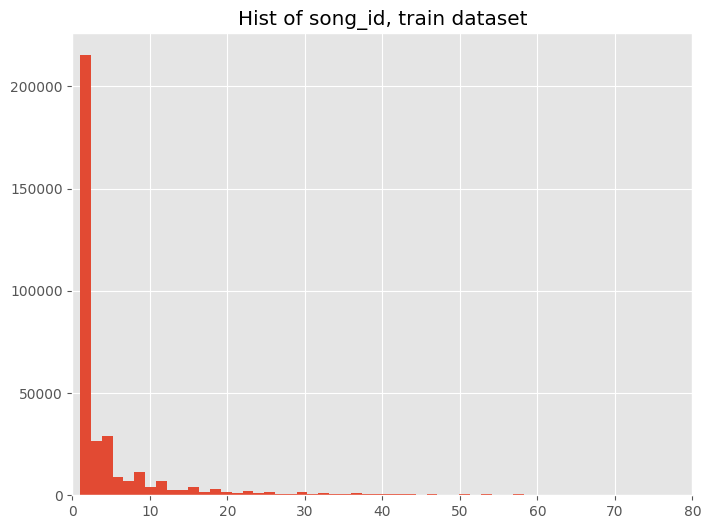

In [111]:
plt.figure(figsize=(8, 6), dpi=100)
song_id_count_train = df_train['song_id'].value_counts()
plt.hist(song_id_count_train, bins = 10000)
plt.title("Hist of song_id, train dataset")
plt.xlim(right=80)
plt.xlim(left=0)
plt.show()

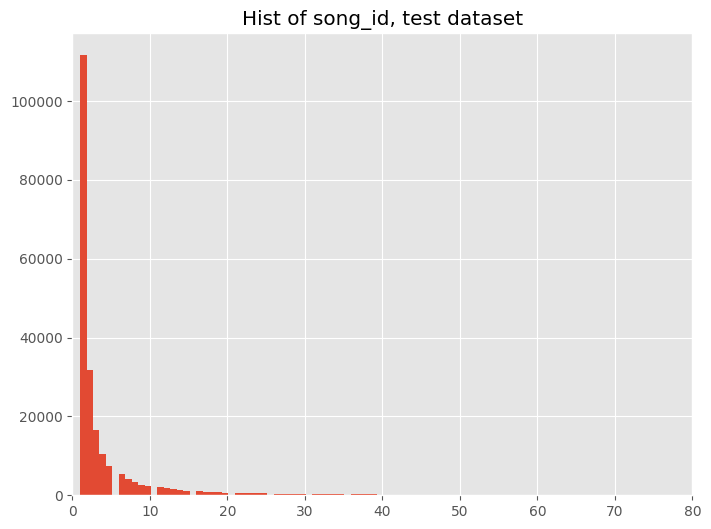

In [110]:
plt.figure(figsize=(8, 6), dpi=100)
song_id_count_test = df_test['song_id'].value_counts()
plt.title("Hist of song_id, test dataset")
plt.hist(song_id_count_test, bins = 10000)
plt.xlim(right=80)
plt.xlim(left=0)
plt.show()

**Посмотрим на самые часто- и самые редковстречаемые песни**

In [80]:
song_id_count_train[:10]

reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    13973
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    13293
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    13079
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=    12855
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=    12004
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=    11835
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=    11745
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=    11521
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=    11131
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=    10791
Name: song_id, dtype: int64

In [78]:
song_id_count_train[-10:]

HnVuRYKgqSTU7C9RoSW3HVDPeRLWg956ahZR34TrppU=    1
jVCP6Gn2yWSN7IHxke9yP1ieeGQMUYlYRDVpIkG7Kzo=    1
o91aGAJQ3SdFv1TRWMkftS16bX4RtLHg9Y/cWHT3QYY=    1
fofEiEvL38z7i81bys3MCPZMR3xCSOULK8eNCLtLEfk=    1
I+AP1buhTIf2aqngj0KjyyX0GcbMQ51xVERt1w8wC0c=    1
DiWGO+b/VNzMIfHcLBCQn3U8f1tKaJ6ajg22XWyEprY=    1
nRgG/+VRBbOt6qcmdASlErWsPkdbPKnyseu6aW+Z1cM=    1
2s3NxjWYuvP1sCMtAugzwqsDloGigLDH1SLLKWgiFPQ=    1
ib9+UJ4WCoyvo9VMOtl46RcBdbOJY/ESw0vGvX8QTog=    1
WJzitiYM7ddyalCdx8/Gkkt1UFSp2t/0ZY74CrMGvWg=    1
Name: song_id, dtype: int64

**Посмотрим на названия вкладок, на которых было запущено событие**

In [93]:
source_system_count_train = df_train['source_system_tab'].value_counts()
source_system_count_test = df_test['source_system_tab'].value_counts()

In [88]:
source_system_count_train

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

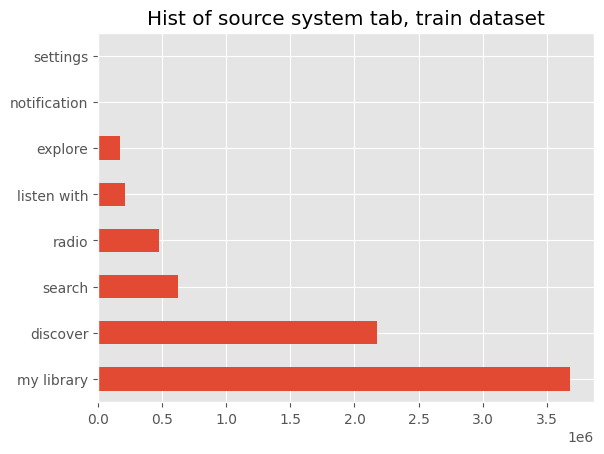

In [106]:
source_system_count_train.plot(kind='barh')
plt.title("Hist of source system tab, train dataset")
plt.show()

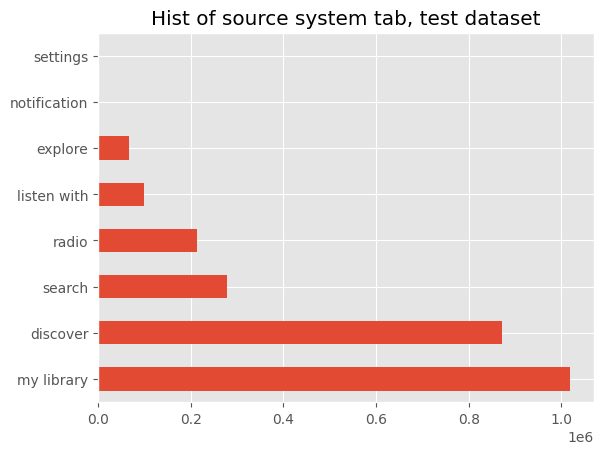

In [107]:
source_system_count_test.plot(kind='barh')
plt.title("Hist of source system tab, test dataset")
plt.show()

**Посмотрим на названия макетов, которые видят пользователи**

In [113]:
source_screen_train = df_train['source_screen_name'].value_counts()
source_screen_test = df_test['source_screen_name'].value_counts()

In [90]:
source_screen_train

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

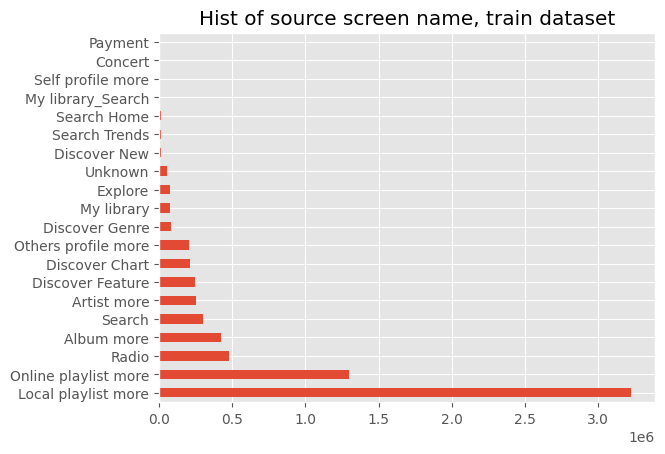

In [114]:
source_screen_train.plot(kind='barh')
plt.title("Hist of source screen name, train dataset")
plt.show()

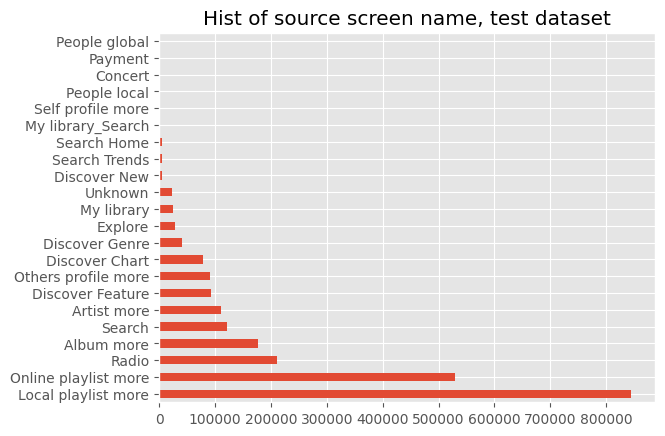

In [115]:
source_screen_test.plot(kind='barh')
plt.title("Hist of source screen name, test dataset")
plt.show()

**Посмотрим на точки входа в приложение**

In [31]:
source_type_train = df_train['source_type'].value_counts()
source_type_test = df_test['source_type'].value_counts()

In [92]:
source_type_train

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

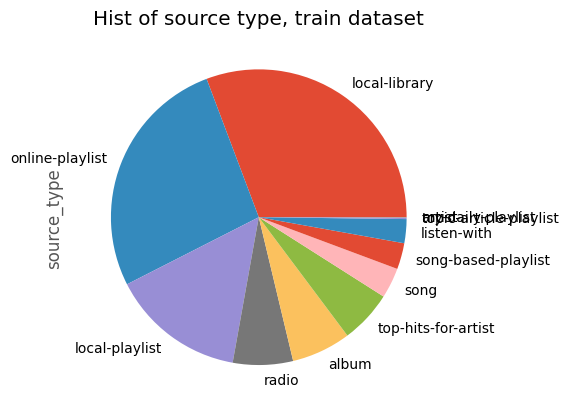

In [35]:
source_type_train.plot(kind='pie')
plt.title("Hist of source type, train dataset")
plt.show()

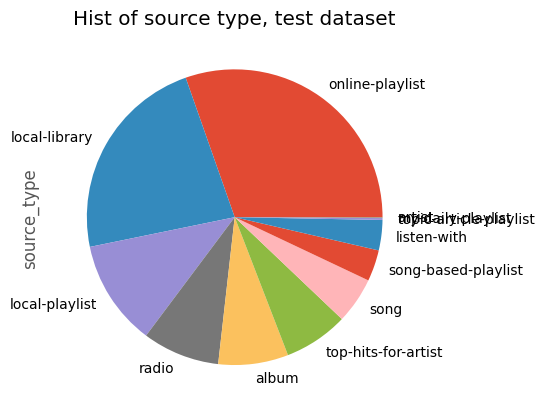

In [36]:
source_type_test.plot(kind='pie')
plt.title("Hist of source type, test dataset")
plt.show()

Из схожести графиков мы можем сделать вывод, что тренировочный и тестовый датасеты похожи

**Проведем некоторые статистические тесты**

Для этого воспользуемся тестом Шапиро-Уилка:  
***Критерий Шапиро-Уилка*** используется для проверки гипотезы $H_0$: «случайная величина $X$ распределена нормально» и является одним наиболее эффективных критериев проверки нормальности.  
Вот немного математики:  

$$
\begin{aligned}      
W=\frac{1}{s^2}\left[\sum_{i=1}^n a_{n-i+1} (x_{n-i+1} -x_i)\right]^2,
s^2 - \text{Несмещенная дисперсия}
\end{aligned}
$$

Получить нормальное распределение - это счастье для исследователя, т.к. к нему применимы мощные стат. критерии, к примеру критерий Фишера

In [65]:
shapiro_train = stats.shapiro(msno_count_train)
shapiro_train

ShapiroResult(statistic=0.7180649042129517, pvalue=0.0)

Смотрим на `pvalue` - это вероятность, при верности нулевой гипотезы, получить такое же значение наблюдаемой статистики или еще более экстремально. У нас `pvalue = 0.0` => гипотеза отвергается

**Тогда посмотрим на графики и убедимся в этом**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


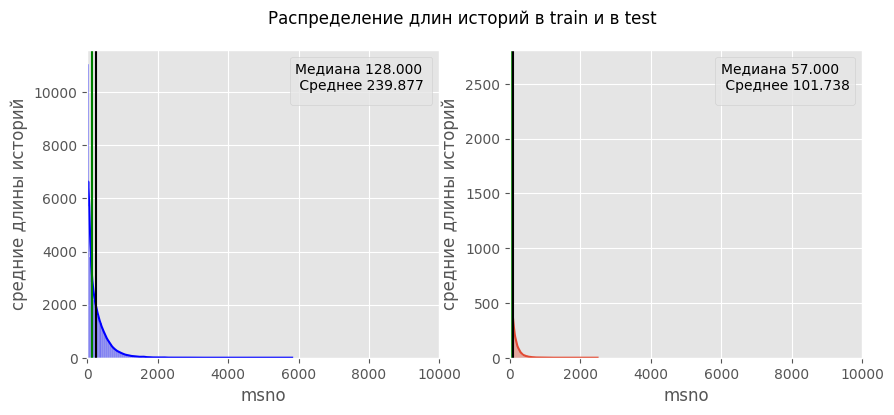

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), dpi=100)
sns.histplot(
    (msno_count_train),
    ax=axes[0],
    bins=100,
    color = 'b' ,
    kde=True);
sns.histplot(
    (msno_count_test),
    ax=axes[1],
    bins=600,
    kde=True);

fig.suptitle("Распределение длин историй в train и в test")

axes[0].legend(title="Медиана {:.3f} \n Среднее {:.3f}".format(
              (np.median(msno_count_train)),
              (msno_count_train.mean())),
              loc="upper right");
axes[0].axvline(np.median(msno_count_train), color='g')
axes[0].axvline(msno_count_train.mean(), color='black')
axes[0].set_ylabel("средние длины историй")
axes[0].set_xlim(0, 10000);

axes[1].legend(title="Медиана {:.3f} \n Среднее {:.3f}".format(
              (np.median(msno_count_test)),
              (msno_count_test.mean())),
              loc="upper right");
axes[1].axvline((np.median(msno_count_test)), color='g')
axes[1].axvline((msno_count_test.mean()), color='black')
axes[1].set_ylabel("средние длины историй")
axes[1].set_xlim(0, 10000);

Больше напоминает $\chi^2_{n}$. Воспользуемся тестом Калмогорова.

***Критерий согласия Колмогорова*** предназначен для проверки гипотезы о принадлежности выборки некоторому закону распределения, то есть проверки того, что эмпирическое распределение соответствует предполагаемой модели.  

$$
\begin{aligned}
H_0 : F(x) \sim X_n^2 \\
H_1 : F(x) \nsim X_n^2
\end{aligned}
$$

In [68]:
stats.kstest(msno_count_train, 'chi2', args=(msno_count_train.mean(), msno_count_train.std(ddof=1)))

KstestResult(statistic=0.8484568793197621, pvalue=0.0, statistic_location=496, statistic_sign=1)

Но это не $\chi^2_{n}$, *пускай* это будет *неизвестные распределение*, но посмотреть на то, как они вглядят хочется. Применим преобразование Бокса-Кокса.  
$$
\begin{aligned}  
 y_i^{\lambda} = \begin{cases}\frac{(y_i+\alpha)^{\lambda}-1}{\lambda},&\text{if } \lambda_1 \neq 0,\\ \log{(y_i+\alpha)},& \text{if } \lambda = 0.\end{cases}
\end{aligned}
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$log(средней длины)$')

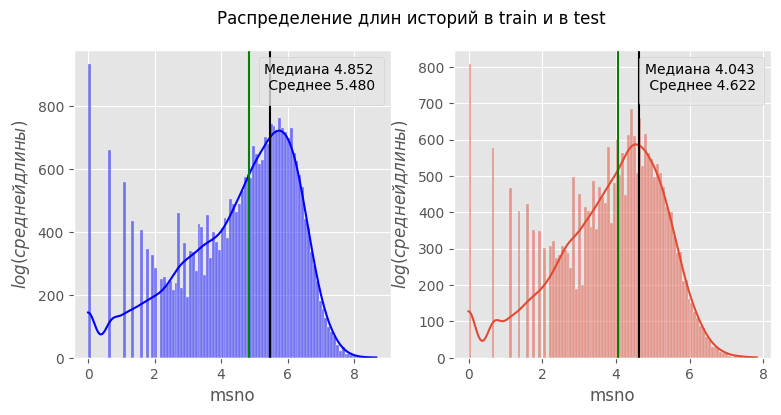

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(9,4), dpi=100)
sns.histplot(
    np.log(msno_count_train),
    ax=axes[0],
    bins=100,
    color = 'b' ,
    kde=True);
sns.histplot(
    np.log(msno_count_test),
    ax=axes[1],
    bins=100,
    kde=True);

fig.suptitle("Распределение длин историй в train и в test")

axes[0].legend(title="Медиана {:.3f} \n Среднее {:.3f}".format(
              np.log(np.median(msno_count_train)),
              np.log(msno_count_train.mean())),
              loc="upper right")
axes[0].axvline(np.log(np.median(msno_count_train)), color='g')
axes[0].axvline(np.log(msno_count_train.mean()), color='black')
axes[0].set_ylabel("$log(средней длины)$")

axes[1].legend(title="Медиана {:.3f} \n Среднее {:.3f}".format(
              np.log(np.median(msno_count_test)),
              np.log(msno_count_test.mean())),
              loc="upper right")
axes[1].axvline(np.log(np.median(msno_count_test)), color='g')
axes[1].axvline(np.log(msno_count_test.mean()), color='black')
axes[1].set_ylabel("$log(средней длины)$")

Графики выглядят похожими.

**Продолжим визуализацию данных из других файлов**

In [198]:
df_songs = pd.read_csv('songs.csv')
df_members = pd.read_csv('members.csv')
df_songs_extra = pd.read_csv('song_extra_info.csv')

**Посмотрим информацию о песнях**

isrc - International Standard Recording Code

In [4]:
print(df_songs)

                                              song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

               artist_name             

In [9]:
print(df_songs_extra)

                                              song_id  \
0        LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=   
1        ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=   
2        u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=   
3        92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=   
4        0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=   
...                                               ...   
2295966  hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=   
2295967  N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=   
2295968  pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=   
2295969  QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=   
2295970  DYKJKSgDOKxb19XzOVO81176qTH0OIHCsfzFRm/BG+g=   

                              name          isrc  
0                               我們  TWUM71200043  
1                  Let Me Love You  QMZSY1600015  
2                              原諒我  TWA530887303  
3                          Classic  USSM11301446  
4                             愛投羅網  TWA471306001  
...      

**Посмотрим информацию о пользователях**

bd - информация о возрасте

In [5]:
print(df_members)

                                               msno  city  bd gender  \
0      XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1      UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2      D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3      mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4      q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   
...                                             ...   ...  ..    ...   
34398  Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=     1   0    NaN   
34399  g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=     4  18   male   
34400  IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=     1   0    NaN   
34401  WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=     1   0    NaN   
34402  xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=     1   0    NaN   

       registered_via  registration_init_time  expiration_date  
0                   7                20110820         20170920  
1    

**Посмотрим на возраст пользователей**

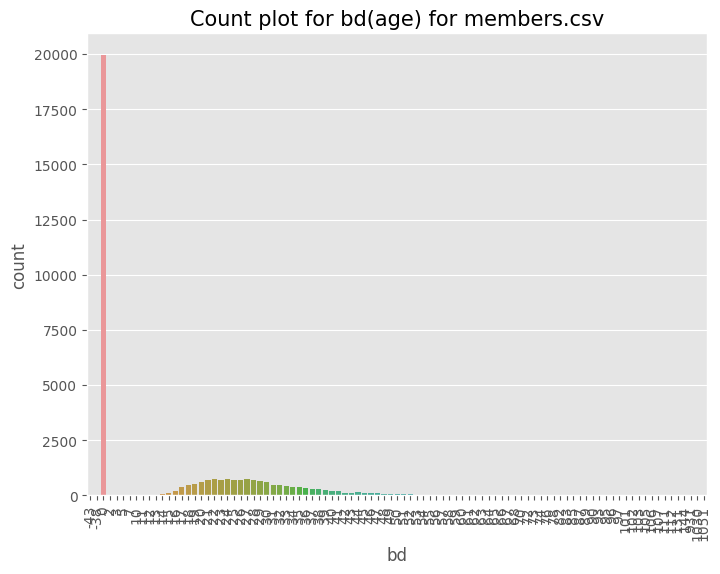

In [39]:
plt.figure(figsize = (8,6)) 
sns.countplot(x ='bd', data = df_members) 
plt.xticks(rotation ='90')
plt.title('Count plot for bd(age) for members.csv',fontsize = 15)
plt.show() 

In [12]:
df_members["bd"].describe()

count    34403.000000
mean        12.280935
std         18.170251
min        -43.000000
25%          0.000000
50%          0.000000
75%         25.000000
max       1051.000000
Name: bd, dtype: float64

Можем заметить, что в графе возраста присутствует некорректная информация с отрицательным возрастом

In [199]:
count = 0
for i in df_members["bd"]:
    if i <= 50 and i >= 10:
        count += 1
percentage = (count / len(df_members["bd"])) * 100
percentage = ("{:.2f}".format(percentage))
print(percentage,"% пользователей между 10 и 50")

40.74 % пользователей между 10 и 50


**Посмотрим на соотношение мужчин и женщин среди пользователей**

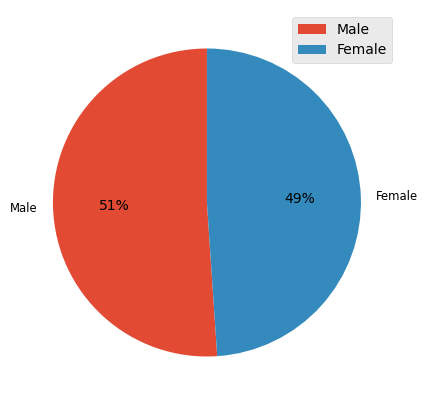

In [21]:
import matplotlib

matplotlib.rcParams['font.size'] = 10.0
labels = ['Male','Female']
plt.figure(figsize = (5, 5))
sizes = pd.value_counts(df_members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()


**Посмотрим на распределение пользователей по различным городам**

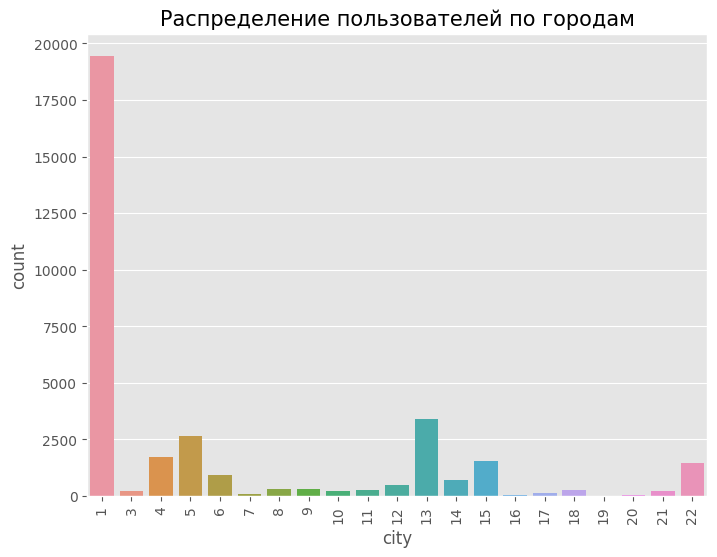

In [200]:
plt.figure(figsize=(8, 6))
sns.countplot(x ='city', data = df_members) 
plt.xticks(rotation='90')
plt.title('Распределение пользователей по городам',fontsize=15)
plt.show() 

**Построим график для столбца, описывающего метод регистрации**

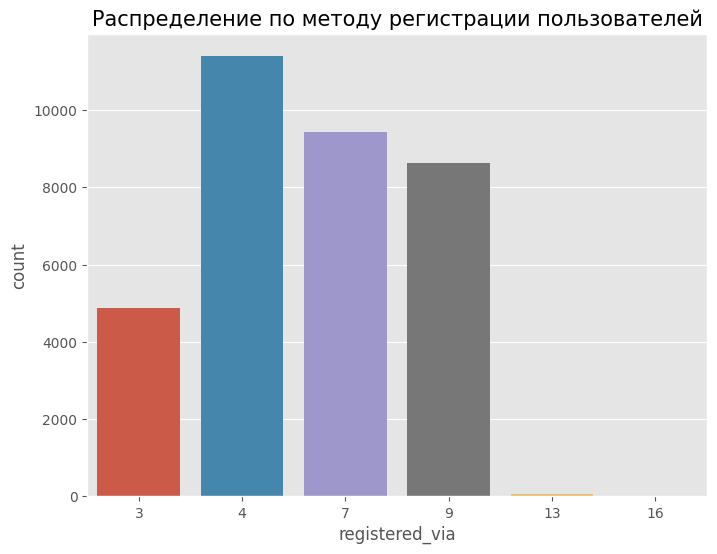

In [201]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'registered_via', data = df_members) 
plt.title('Распределение по методу регистрации пользователей',fontsize = 15)
plt.show() 

In [42]:
df_members["expiration_date"]= pd.to_datetime(df_members["expiration_date"],format='%Y%m%d') 
df_members["registration_init_time"]= pd.to_datetime(df_members["registration_init_time"],format='%Y%m%d') 
df_members.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

In [43]:
df_members["registration_init_time"].head()
df_members["expiration_date"].head()

0   2017-09-20
1   2017-06-22
2   2017-07-12
3   2015-09-07
4   2017-06-13
Name: expiration_date, dtype: datetime64[ns]

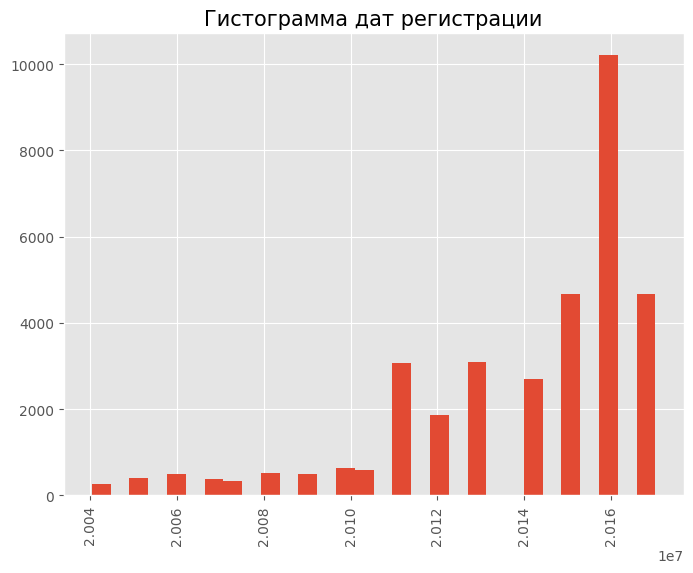

In [205]:
plt.figure(figsize = (8,6))
plt.hist(df_members["registration_init_time"], bins = 30)
plt.xticks(rotation = '90')
plt.title('Гистограмма дат регистрации', fontsize = 15)
plt.show()

**Преобразуем продолжительность песен из секунд в минуты и построим график длины песен**

In [52]:
from tqdm import tqdm
lst=[]
for i in tqdm(df_songs["song_length"]):
    minutes = ((i/(1000*60))%60)
    minutes = round(minutes)
    lst.append(minutes)

100%|█████████████████████| 2296320/2296320 [00:01<00:00, 1495763.37it/s]


In [54]:
df_songs["song_duration_minutes"]=lst

In [55]:
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,4
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,3
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,4
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,5
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,2


Text(0.5, 1.0, 'PDF for song_duration_minutes')

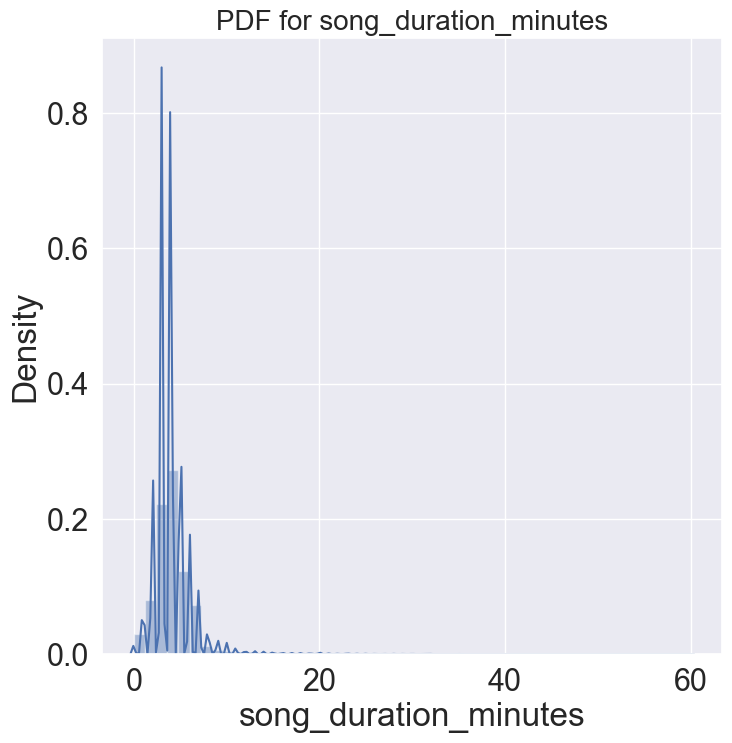

In [61]:
plt.figure(figsize = (8, 8)) 
sns.distplot(df_songs.song_duration_minutes)
sns.set(font_scale=2)
plt.title('PDF for song_duration_minutes', fontsize = 20)

**Проанализируем процент значений NaN в файлах с информацией о песнях**

Для этого соединим датафреймы df_song и df_song_extra_info

In [64]:
df_song_info = df_songs_extra.merge(df_songs, on='song_id', how='left')


In [67]:
print("Total percentage for NaN value in song_id column        : ",(df_song_info["song_id"].isna().sum()/len(df_song_info["song_id"]))*100,"%")
print("Total percentage for NaN value in name column           : ",(df_song_info["name"].isna().sum()/len(df_song_info["name"]))*100,"%")
print("Total percentage for NaN value in isrc column           : ",(df_song_info["isrc"].isna().sum()/len(df_song_info["isrc"]))*100,"%")
print("Total percentage for NaN value in song_length column    : ",(df_song_info["song_length"].isna().sum()/len(df_song_info["song_length"]))*100,"%")
print("Total percentage for NaN value in genre_ids column      : ",(df_song_info["genre_ids"].isna().sum()/len(df_song_info["genre_ids"]))*100,"%")

Total percentage for NaN value in song_id column        :  0.0 %
Total percentage for NaN value in name column           :  8.710911418306241e-05 %
Total percentage for NaN value in isrc column           :  5.9472876617344035 %
Total percentage for NaN value in song_length column    :  0.023911451843250633 %
Total percentage for NaN value in genre_ids column      :  4.121219301114866 %


In [68]:
print("Total percentage for NaN value in artist_name column    : ",(df_song_info["artist_name"].isna().sum()/len(df_song_info["artist_name"]))*100,"%")
print("Total percentage for NaN value in composer column       : ",(df_song_info["composer"].isna().sum()/len(df_song_info["composer"]))*100,"%")
print("Total percentage for NaN value in lyricist column       : ",(df_song_info["lyricist"].isna().sum()/len(df_song_info["lyricist"]))*100,"%")
print("Total percentage for NaN value in language column       : ",(df_song_info["language"].isna().sum()/len(df_song_info["language"]))*100,"%")

Total percentage for NaN value in artist_name column    :  0.023911451843250633 %
Total percentage for NaN value in composer column       :  46.6681417143335 %
Total percentage for NaN value in lyricist column       :  84.71674947113878 %
Total percentage for NaN value in language column       :  0.023955006400342163 %


### __2. Обучение модели и предсказание__ 

**Разделим train.csv на тренировочный и тестовый датасет, чтобы было, на чем высчитывать нашу метрику**

In [29]:
df = pd.read_csv('train.csv')

In [30]:
train_size = len(df) - round(len(df) * 0.2)
train_part = df.iloc[:train_size]
test_part = df.iloc[train_size:]
train_part.to_csv('train_for_task.csv')
test_part.to_csv('test_for_task.csv')

In [31]:
train_part

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
5901929,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,/r/F8SsC84+7/rg/BwlZnTlGzyCOX3Y8UdDkbY/0ZIA=,my library,Local playlist more,local-library,0
5901930,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,vMmYn3V5T7jv+EVVUBRbiUdO/wNDjCCio3CgaXMJ/eU=,my library,Local playlist more,local-library,1
5901931,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,b8Ec5KHbhiJc+Aeg4hgVx7mkdk5UlDZyW48Y1OfyqBU=,my library,Local playlist more,local-library,1
5901932,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,fwaxN4NL0q27tHQq4VEPCKVTywMIGqImrgRvFLnrVJw=,my library,Local playlist more,local-library,1


In [32]:
test_part

,msno,song_id,source_system_tab,source_screen_name,source_type,target
5901934,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,JTVy3aCLoTFkqPK4pkGBy0YTlH0zpkubCoKMh07WYfM=,my library,Local playlist more,local-library,1
5901935,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,2TR1fCpa5/ac/xe+hdOe52nBZ6afSU49gsGQbhTQVzk=,my library,Local playlist more,local-library,0
5901936,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,wev1Fi6KYkCSFAstQfhxJPZv7wkn8wGepys+KDmeBy4=,my library,Local playlist more,local-library,1
5901937,v04FgzXSdai5doJPrcwbrQTMbnETwLB5Li0t36X6kSQ=,NhQfOVnptpW5z5qsP/sN+hVS8TM2iYvdy/ZGVe7K+kM=,my library,Local playlist more,local-library,1
5901938,Rw5fS0aEzNBUaVMFQLpD2oW11xH2Jv107h49EUVXiTM=,OakhL7CLirelAGEP9sYyP6fmTa8HV1mD/qVdpM6o5uE=,discover,Online playlist more,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [2]:
train = pd.read_csv('train_for_task.csv', index_col = 0)
test = pd.read_csv('test_for_task.csv', index_col = 0)
tmp_test = pd.read_csv('test_for_task.csv')

ids = tmp_test['Unnamed: 0'].values
test_targets = tmp_test['target'].values
test.drop(columns = ['target'], inplace = True)

sei = pd.read_csv('song_extra_info.csv')
members = pd.read_csv('members.csv',parse_dates=['registration_init_time', 'expiration_date'])
songs = pd.read_csv('songs.csv')

Извлекаем год из ISRC кода

In [7]:
def get_codes(isrc):
    if pd.isnull(isrc):
        return np.nan
    else:
        if int(str(isrc)[5:7]) > 17:
            temp =  1900+int(str(isrc)[5:7])
        else:
            temp = 2000+int(isrc[5:7])
        return temp

In [8]:
sei['year'] = sei['isrc'].apply(lambda x: get_codes(x))
sei.sample(10)

,song_id,name,isrc,year
940106,/IHabH6mOvzgCcXswqGYKiaKnynIIlqIUx2GSXIoEE8=,Carmen Suite No. 1: III. Intermezzo,QMFMG1409800,2014.0
1674487,0IKvzZfhD2mCyegMhB3eBwlDBfO+kGN9n10SWyjHjNk=,Breathe,US43C1603237,2016.0
1061600,71kQK8WSYAOahwQMP8HOrEqFsoSjjvK5HEUyUcOgFMI=,Minsan Pa,PHUM71600042,2016.0
1341117,2fwRCFxnC7DNmeJpfA8+NdrEbFO5NYhd+yJ+ETEGjYY=,Tohse Ketna Pyar Karile,QMFMF1433949,2014.0
1753983,eJXrB3fbzWWe6awTcMKlFfTDE/Gu8ogmFJspVuRwyrk=,Bitches Everywhere,ITBE71400179,2014.0
876150,OkrfSApSXYjAVsD9E5Wt0Scm0REgWyBHCIWdiN85TyI=,Midnight City,DEON11205309,2012.0
597222,qRXe7cT6KuimFj8Yk1Smei/t5Um8ty+B0o4LGRGrs5s=,In My Father's House,DEPZ69165691,1991.0
62825,trpDZOPi+sor7+3DYhReBbMg9+KQcGY6FoxYwOAwsOM=,幸福滿滿,NaN,NaN
156498,COk6eIb5oltl0R3asAGu1OCzA3LvulpSENPh56cnlEQ=,陪妳走一程,TWA119400305,1994.0
1035438,dyTgXK6TERuHchCReCDUc/uDG3c9WNTGI+MvUCeNVDw=,I Heart Bougie (Toka Project Mix) - Ken ECB,NaN,NaN


In [9]:
members['membership_days'] = members['expiration_date'].subtract(members['registration_init_time']).dt.days.astype(int)
members['registration_year'] = members['registration_init_time'].dt.year
members['expiration_year'] = members['expiration_date'].dt.year
members.drop(columns = ['registration_init_time' , 'expiration_date'], inplace = True)
members.head()

,msno,city,bd,gender,registered_via,membership_days,registration_year,expiration_year
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2223,2011,2017
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,725,2015,2017
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,457,2016,2017
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,1,2015,2015
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,138,2017,2017


Объединяем датафреймы train и test с датафреймами songs, members и sei

In [10]:
train = train.merge(songs , on='song_id' , how='left')
train = train.merge(members , on = 'msno' , how='left')
train = train.merge(sei , on = 'song_id' , how='left')
test  = test.merge(songs , on='song_id' , how='left')
test = test.merge(members , on = 'msno' , how = 'left')
test =  test.merge(sei , on = 'song_id' , how = 'left')

Посчитаем долю пустых строк

In [11]:
print(train['song_length'].isnull().value_counts()/train.shape[0])
train['song_length'].fillna(train['song_length'].mean() , inplace = True)
train['song_length'] = train['song_length'].astype(np.uint32)
print(train['language'].isnull().value_counts()/train.shape[0])
train['language'].fillna(train['language'].mode().values[0] , inplace= True)
train['language'] = train['language'].astype(np.int8)
test['song_length'].fillna(test['song_length'].mean() , inplace = True)
test['song_length'] = test['song_length'].astype(np.uint32)
test['language'].fillna(test['language'].mode().values[0] , inplace= True)
test['language'] = test['language'].astype(np.int8)

False    0.999983
True     0.000017
Name: song_length, dtype: float64
False    0.999979
True     0.000021
Name: language, dtype: float64


In [12]:
def genre_count(genre):
    if genre == 'no_genre_id':
        return 0
    else :
        return genre.count('|') + 1
print(train['genre_ids'].isnull().value_counts()/train.shape[0])
train['genre_ids'].fillna('no_genre_id' , inplace= True)
train['genre_ids_count'] = train['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)
test['genre_ids'].fillna('no_genre_id' , inplace= True)
test['genre_ids_count'] = test['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)
                                                       

False    0.984419
True     0.015581
Name: genre_ids, dtype: float64


Вычисляем количество артистов

In [13]:
def artist_count(art):
    if art=='no_artist_name':
        return 0
    else:
        return art.count('|')+art.count('/') + art.count('//') + art.count(';') + 1
train['artist_name'].isnull().value_counts()
train['artist_name'].fillna('no_artist_name' , inplace = True)
train['artist_count'] = train['artist_name'].apply(lambda x : artist_count(x)).astype(np.int8)
test['artist_name'].fillna('no_artist_name' , inplace = True)
test['artist_count'] = test['artist_name'].apply(lambda x : artist_count(x)).astype(np.int8)

Аналогично, подсчитываем количество композиторов и количество лирик

In [14]:
def  count_composer(comp):
    if comp=='no_composer':
        return 0
    else:
        return comp.count('|')+comp.count('/') + comp.count('//') + comp.count(';') + 1
def  count_lyricist(lyr):
    if lyr=='no_lyricist':
        return 0
    else:
        return lyr.count('|')+lyr.count('/') + lyr.count('//') + lyr.count(';') + 1

In [15]:
train['composer'].fillna('no_composer',inplace=True)
train['composer_count'] = train['composer'].apply(lambda x: count_composer(x)).astype(np.int8)
train['lyricist'].fillna('no_lyricist',inplace=True)
train['lyricist_count'] = train['lyricist'].apply(lambda x: count_lyricist(x)).astype(np.int8)
test['composer'].fillna('no_composer',inplace=True)
test['composer_count'] = test['composer'].apply(lambda x: count_composer(x)).astype(np.int8)
test['lyricist'].fillna('no_lyricist',inplace=True)
test['lyricist_count'] = test['lyricist'].apply(lambda x: count_lyricist(x)).astype(np.int8)

Создаем словари, содержащие количество воспроизведений каждой песни в тренировочном и тестовом наборах данных.

In [16]:
dict_count_song_played_train = {k: v for k, v in train['song_id'].value_counts().iteritems()}
dict_count_song_played_test = {k: v for k, v in test['song_id'].value_counts().iteritems()}
def return_number_played(x):
    try:
        return dict_count_song_played_train[x]
    except KeyError:
        try:
            return dict_count_song_played_test[x]
        except KeyError:
            return 0
train['number_of_time_played'] = train['song_id'].apply(lambda x: return_number_played(x))
test['number_of_time_played'] = test['song_id'].apply(lambda x: return_number_played(x))

Создаем словарь с количеством действий для каждого пользователя

In [17]:
dict_user_activity = {k:v for k,v in pd.concat([train['msno'] , test['msno']] , axis = 0).value_counts().iteritems()}
def return_user_activity(x):
    try:
        return dict_user_activity[x]
    except KeyError:
        return 0
train['user_activity_msno'] = train['msno'].apply(lambda x: return_user_activity(x))
test['user_activity_msno'] = test['msno'].apply(lambda x: return_user_activity(x))

In [20]:
train_col = list(train.columns)
test_col = list(test.columns)
for f in test_col :
    if f not in train_col:
        print('Error! Column from Test not found in train is ->' , f)
label_encoding = ['source_system_tab', 'source_screen_name',
       'source_type','gender']
drop = ['msno', 'song_id' , 'isrc','artist_name',
       'composer', 'lyricist','name','genre_ids']
min_max_scaling = ['number_of_time_played', 'user_activity_msno','membership_days', 'song_length']

Применяем LabelEncoder и MinMaxScaler

In [21]:
for f in label_encoding:
    lb = LabelEncoder()
    lb.fit(list(train[f].values) + list(test[f].values))
    train[f] = lb.transform(list(train[f].values))
    test[f] = lb.transform(list(test[f].values))
for f in min_max_scaling:
    ms = MinMaxScaler()
    train[f] = ms.fit_transform(train[[f]])
    test[f] = ms.transform(test[[f]])

In [22]:
for col in train.columns:
    if train[col].dtype == object:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

In [23]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,expiration_year,name,isrc,year,genre_ids_count,artist_count,composer_count,lyricist_count,number_of_time_played,user_activity_msno
2807020,fVZedYe9G51wW8jy3Ws7FuF5IKx7zxQYWvPAfCdIRJE=,lCjMoHaoM7Fz3SJsIyvyXldjCGR10FQi3qeFvQGEfB8=,0,5,7,0,0.019898,1609,Afrojack| Dimitri Vegas| Like Mike and NERVO,no_composer,...,2017,The Way We See The World (Tomorrowland Anthem ...,NLC281111869,2011.0,1,3,0,0,0.017983,0.275696
2565580,HsrmDxxDgi+2jNCouqM9/tAMEharXQDjxs/TbGWBflM=,nnGh305rOmte1K/4D+qsL1LyY6P+jvDlzATIqwbCa/0=,0,1,11,1,0.021366,465,田馥甄 (Hebe),劉大江,...,2017,不醉不會,TWD951343101,2013.0,1,1,1,1,0.285726,0.199553
4316469,6hVgIhV31CwJ9PeWwTuTXhDDFdhwu2vxXzlbA2r8Jks=,+Ky0PnZCyYqfRXroxEQOsKACymYfhsj+1qz3trSvcno=,3,8,3,1,0.020769,465,G.E.M.鄧紫棋,G.E.M. 鄧紫棋,...,2017,盲點 (Blindspot),HKI111500005,2015.0,1,1,1,1,0.032193,0.148677
4881456,JxeCasSiXlXNir1H3xZZM9k0lqpWhtCsYHTRC5tl7KA=,SKRQpz3EM5UIxT2LCGzK5k0aYg4QtyHWtr0L/EK6By8=,3,8,3,1,0.019816,458,田馥甄 (Hebe),李宗盛/王力宏,...,2017,凡人歌+火,TWD951676102,2016.0,1,1,2,4,0.139772,0.161396
840248,Er/bmALu5hziIhxjAX96nB8i5csAbncso33zJEwOFBc=,oBx6PpYquxKVkqXn+6gXWJZQTyl5+ckdFp2ZR8mxZ64=,3,9,4,0,0.024746,465,aMEI (張惠妹),Ni Zi Gang,...,2017,來鬧的 (Party Crashers),TWEM31104008,2011.0,1,1,1,1,0.001846,0.040908
3532869,eU8WVZclSIjgIiuu7uYL3f7pwdw+XmOUjRSE7KlAZv0=,B8RPBDoaNmSKdIaw41h/JMBeQhdLZhgwsEabAmx3gpE=,0,11,7,1,0.023783,458,楊丞琳 (Rainie Yang),Jia Ying Xu,...,2017,點水,TWUM71400085,2014.0,1,1,1,0,0.103003,0.155380
754117,0c3FemPS+wphQliqLMTGFM2hUnnwRHxol7UyMSYJ0BM=,caXQoad48M9jS7s0V227KI5i0HnARffYKOxe0fYVtrM=,0,8,3,0,0.024460,359,Coldplay,Steven Tyler| Joseph Perry| Desmond Child,...,2017,Yellow,GBAYE0000267,2000.0,1,1,3,0,0.124117,0.046064
1852934,oC0NYrs+pb7zRhh4/6bQCA+Lvp8pfoNtCYEXk/jJtug=,/BAxr8kZjPTsOVE3hBodR8Av30dbfHTnfIcgvt5tQnw=,3,20,3,0,0.025806,2022,Avengers Assemble-OST,no_composer,...,2017,Live To Rise,QMQAV1200001,2012.0,1,1,0,0,0.000000,0.038501
4969844,7Y1y6HK0RUAVuJISSZE28WaEcP3w4fAfb2L0zf422JY=,7XjSvrL47/EJD2mNR0e2Ja+ed/Dm0j35tKPQLiO2Hjk=,3,8,4,1,0.025098,1609,Marshmello,no_composer,...,2017,Alone,CA6D21600147,2016.0,1,1,0,0,0.173732,0.091268
5659927,VmVNLJQRDxLsfXpE9ViQWm/H7P/gB/sjye6tdBBwf9s=,YJ49LUR5jj4BudHSL7j/HaxnGIfxMoFLhdNVi6BAeCQ=,7,11,7,0,0.027895,465,黃小琥 (Tiger Huang),伍思凱,...,2017,不只是朋友,TWA179000401,1990.0,1,1,1,1,0.017742,0.030079


In [24]:
test.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,...,expiration_year,name,isrc,year,genre_ids_count,artist_count,composer_count,lyricist_count,number_of_time_played,user_activity_msno
0,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,JTVy3aCLoTFkqPK4pkGBy0YTlH0zpkubCoKMh07WYfM=,3,8,3,0.023793,465,楊韻禾 (Melody Yeung),楊韻禾Mel Yeung / 陳熙Josh Chen,崔惟楷Luke”skywalker”Tsui,...,2017,你不知道,TWJ970700301,2007.0,1,1,2,1,0.012364,0.113441
1,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,2TR1fCpa5/ac/xe+hdOe52nBZ6afSU49gsGQbhTQVzk=,3,8,3,0.017543,465,倪安東 (Anthony Neely),Skot Suyama 陶山| 倪安東,倪安東,...,2017,Wake up,TWD951244101,2012.0,1,1,2,1,0.008992,0.113441
2,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,wev1Fi6KYkCSFAstQfhxJPZv7wkn8wGepys+KDmeBy4=,3,8,3,0.018721,359,Various Artists,Noah Feldshuh| Casey Harris| Sam Harris| A. Gr...,no_lyricist,...,2017,Unsteady,USUM71603401,2016.0,1,1,5,0,0.105010,0.113441
3,v04FgzXSdai5doJPrcwbrQTMbnETwLB5Li0t36X6kSQ=,NhQfOVnptpW5z5qsP/sN+hVS8TM2iYvdy/ZGVe7K+kM=,3,8,3,0.026767,1259,Rae Sremmurd,A.Brown| Radric Davis| Michael L. Williams II|...,no_lyricist,...,2017,Black Beatles,USUM71603293,2016.0,1,1,4,0,0.287653,0.059471
4,Rw5fS0aEzNBUaVMFQLpD2oW11xH2Jv107h49EUVXiTM=,OakhL7CLirelAGEP9sYyP6fmTa8HV1mD/qVdpM6o5uE=,0,11,7,0.023725,no_genre_id,G.E.M.鄧紫棋,no_composer,no_lyricist,...,2017,泡沫,HKI111200214,2012.0,0,1,0,0,0.456888,0.115332


In [25]:
X_train = train.drop(columns = ['target'] , axis = 1)
Y_train = train['target'].values
X_test = test
train_set = lgb.Dataset(X_train , Y_train)

**Обучим модель**

Метрика взята та, что предлагалась в соревновании на kaggle. Гиперпараметры подобраны с помощью GridSearch

In [26]:
params = {
        'objective': 'binary',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 200,
        'metric' : 'auc'
    }

mus_model = lgb.train(params, train_set=train_set,  valid_sets=train_set, verbose_eval=5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.320865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[5]	training's auc: 0.746113
[10]	training's auc: 0.759458
[15]	training's auc: 0.767933
[20]	training's auc: 0.772295
[25]	training's auc: 0.77571
[30]	training's auc: 0.7789
[35]	training's auc: 0.781546
[40]	training's auc: 0.785311
[45]	training's auc: 0.787591
[50]	training's auc: 0.789403
[55]	training's auc: 0.791405
[60]	training's auc: 0.793006
[65]	training's auc: 0.794476
[70]	training's auc: 0.796014
[75]	training's auc: 0.797188
[80]	training's auc: 0.798467
[85]	training's auc: 0.799807
[90]	training's auc: 0.801043
[95]	training's auc: 0.802085
[100]	training's auc: 0.803183
[105]	training's auc: 0.804908
[110]	training's auc: 0.805938
[115]	training's auc: 0.807229
[120]	training's auc: 0.80831
[125]	training's auc: 0.809099
[130]	training's auc: 0.810497
[135]	training's auc: 0.811378
[140]	training's auc: 

Получим предсказания

In [172]:
pred_test = mus_model.predict(X_test)
print('Saving Predictions')
sub = pd.DataFrame()
sub['id'] = ids
sub['target'] = pred_test


Saving Predictions


In [173]:
sub

,id,target
0,5901934,0.608071
1,5901935,0.606847
2,5901936,0.690614
3,5901937,0.881739
4,5901938,0.405727
...,...,...
1475479,7377413,0.606918
1475480,7377414,0.703352
1475481,7377415,0.879124
1475482,7377416,0.640898


**Подготовим датафрейм для вычисления метрики**

Для этого для каждого пользователя сгруппируем списки из предсказанных и истинных песен

In [174]:
def round_value(x):
    return round(x)  

sub['target'] = sub['target'].apply(round_value)

In [175]:
df_new1 = train[['msno', 'song_id']]

In [176]:
print(df_new1.shape)
df_new1

(5901934, 2)


,msno,song_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=
...,...,...
5901929,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,/r/F8SsC84+7/rg/BwlZnTlGzyCOX3Y8UdDkbY/0ZIA=
5901930,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,vMmYn3V5T7jv+EVVUBRbiUdO/wNDjCCio3CgaXMJ/eU=
5901931,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,b8Ec5KHbhiJc+Aeg4hgVx7mkdk5UlDZyW48Y1OfyqBU=
5901932,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,fwaxN4NL0q27tHQq4VEPCKVTywMIGqImrgRvFLnrVJw=


In [177]:
df_new2 = sub['target']

In [178]:
predict_target = pd.merge(df_new1, df_new2, left_index=True, right_index=True)
predict_target

,msno,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,0
...,...,...,...
1475479,+2XBp2p9atTpyVPWac3SEEW41i8Xrnl7Utl/h8T4iOo=,YOcFhs4/oIc6A6/FKsq2xkGTISDjJH/zvWGrz+Bk7V4=,1
1475480,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,AeFYUj/BA1epsa5mS3uQxbbS04PKiUr84gSVH430N24=,1
1475481,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,rQiV+w5ivD+o/Bi7noG2B4JjmA/h/Sxuxnl3wCaqb6s=,1
1475482,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,bTlSHgnwaBMIKHseTFHanJ3Zr4x82ybrGkexpnxDhTY=,1


In [179]:
true_target = pd.merge(df_new1, df_new2, left_index=True, right_index=True)
true_target

,msno,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,0
...,...,...,...
1475479,+2XBp2p9atTpyVPWac3SEEW41i8Xrnl7Utl/h8T4iOo=,YOcFhs4/oIc6A6/FKsq2xkGTISDjJH/zvWGrz+Bk7V4=,1
1475480,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,AeFYUj/BA1epsa5mS3uQxbbS04PKiUr84gSVH430N24=,1
1475481,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,rQiV+w5ivD+o/Bi7noG2B4JjmA/h/Sxuxnl3wCaqb6s=,1
1475482,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,bTlSHgnwaBMIKHseTFHanJ3Zr4x82ybrGkexpnxDhTY=,1


In [180]:
targ = pd.DataFrame(test_targets, columns=['target'])
targ

,target
0,1
1,0
2,1
3,1
4,1
...,...
1475479,1
1475480,0
1475481,1
1475482,1


In [181]:
predict_target = pd.merge(df_new1, targ, left_index=True, right_index=True)
predict_target

,msno,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1
...,...,...,...
1475479,+2XBp2p9atTpyVPWac3SEEW41i8Xrnl7Utl/h8T4iOo=,YOcFhs4/oIc6A6/FKsq2xkGTISDjJH/zvWGrz+Bk7V4=,1
1475480,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,AeFYUj/BA1epsa5mS3uQxbbS04PKiUr84gSVH430N24=,0
1475481,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,rQiV+w5ivD+o/Bi7noG2B4JjmA/h/Sxuxnl3wCaqb6s=,1
1475482,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,bTlSHgnwaBMIKHseTFHanJ3Zr4x82ybrGkexpnxDhTY=,1


In [182]:
unique_values = pd.concat([predict_target['song_id'], true_target['song_id']]).unique()
dictionary = {value: int(idx) for idx, value in enumerate(unique_values)}

In [183]:
predict_target['song_id'] = predict_target['song_id'].map(dictionary)
true_target['song_id'] = true_target['song_id'].map(dictionary)

In [184]:
predict_target

,msno,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,0.0,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,1.0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2.0,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,3.0,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,4.0,1
...,...,...,...
1475479,+2XBp2p9atTpyVPWac3SEEW41i8Xrnl7Utl/h8T4iOo=,7052.0,1
1475480,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,6208.0,0
1475481,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,2664.0,1
1475482,pJo7ICjSB0lWzeDQCoQpyUfMKVjiXP5/p4cBhC/KzTc=,354.0,1


In [185]:
predict_grouped = predict_target[predict_target['target'] == 1].groupby('msno')['song_id'].apply(list).reset_index()
predict_grouped_df = pd.DataFrame({'msno': predict_grouped['msno'], 'predict_song_id_list': predict_grouped['song_id']})
predict_grouped_df = predict_grouped_df.sort_values(by='msno')

print(predict_grouped_df)

                                               msno  \
0      ++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=   
1      ++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=   
2      ++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=   
3      ++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU=   
4      +/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=   
...                                             ...   
28021  zzH8+kEnDu02NMWBPCjio6wOujBZUs7y9o7AWWcvIGo=   
28022  zzZBJUYXrb168A4Ff4sA8L2iOH0x4ciKdD6WkV53XaE=   
28023  zzompfSaMamqvjyCMYvgUBwYrxh8fHE40z3f73CQoak=   
28024  zzqc2ja7z10FtSpagYVcAZXg/gPRq7wcDZuNFj+zJSU=   
28025  zzzRi5ek1YCKTGns8C77xwAutE05PAPmz8T/pIIQhzE=   

                                    predict_song_id_list  
0      [84155.0, 88380.0, 163.0, 49453.0, 5537.0, 227...  
1      [15.0, 629.0, 6978.0, 1136.0, 7816.0, 972.0, 1...  
2                                      [20934.0, 4691.0]  
3                                                     []  
4      [21781.0, 2881.0, 1387.0, 346.0, 124.

In [186]:
true_grouped = true_target[true_target['target'] == 1].groupby('msno')['song_id'].apply(list).reset_index()
true_grouped_df = pd.DataFrame({'msno': true_grouped['msno'], 'true_song_id_list': true_grouped['song_id']})
true_grouped_df = true_grouped_df.sort_values(by='msno')

print(true_grouped_df)

                                               msno  \
0      ++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=   
1      ++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=   
2      ++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=   
3      ++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU=   
4      +/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=   
...                                             ...   
28021  zzH8+kEnDu02NMWBPCjio6wOujBZUs7y9o7AWWcvIGo=   
28022  zzZBJUYXrb168A4Ff4sA8L2iOH0x4ciKdD6WkV53XaE=   
28023  zzompfSaMamqvjyCMYvgUBwYrxh8fHE40z3f73CQoak=   
28024  zzqc2ja7z10FtSpagYVcAZXg/gPRq7wcDZuNFj+zJSU=   
28025  zzzRi5ek1YCKTGns8C77xwAutE05PAPmz8T/pIIQhzE=   

                                       true_song_id_list  
0      [84155.0, 49453.0, 5537.0, 2273.0, 22167.0, 18...  
1      [7365.0, 643.0, 1136.0, 1494.0, 13800.0, 12024...  
2                               [27047.0, 184.0, 4691.0]  
3                                                     []  
4      [21781.0, 2881.0, 1387.0, 346.0, 124.

In [187]:
true_df = true_grouped_df['true_song_id_list']
true_df

0        [84155.0, 49453.0, 5537.0, 2273.0, 22167.0, 18...
1        [7365.0, 643.0, 1136.0, 1494.0, 13800.0, 12024...
2                                 [27047.0, 184.0, 4691.0]
3                                                       []
4        [21781.0, 2881.0, 1387.0, 346.0, 124.0, 172.0,...
                               ...                        
28021    [1338.0, 9165.0, 41471.0, 8830.0, 17576.0, 396...
28022    [4723.0, 3452.0, 4724.0, 8093.0, 2724.0, 51373...
28023    [25362.0, 15031.0, 3210.0, 139474.0, 17987.0, ...
28024    [48.0, 1361.0, 289.0, 44941.0, 58958.0, 1110.0...
28025                                                   []
Name: true_song_id_list, Length: 28026, dtype: object

In [188]:
target_df = pd.merge(predict_grouped_df, true_df, left_index=True, right_index=True)
target_df = target_df[(target_df['true_song_id_list'].apply(len) > 0) & (target_df['predict_song_id_list'].apply(len) > 0)]

target_df

,msno,predict_song_id_list,true_song_id_list
0,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,"[84155.0, 88380.0, 163.0, 49453.0, 5537.0, 227...","[84155.0, 49453.0, 5537.0, 2273.0, 22167.0, 18..."
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,"[15.0, 629.0, 6978.0, 1136.0, 7816.0, 972.0, 1...","[7365.0, 643.0, 1136.0, 1494.0, 13800.0, 12024..."
2,++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=,"[20934.0, 4691.0]","[27047.0, 184.0, 4691.0]"
4,+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=,"[21781.0, 2881.0, 1387.0, 346.0, 124.0, 172.0,...","[21781.0, 2881.0, 1387.0, 346.0, 124.0, 172.0,..."
9,+0+XaewkS3za58vHwKCVGwRYRvjig4lTtKDV/tOkzbU=,"[7791.0, 29354.0, 29355.0, 29357.0, 55655.0, 1...","[7791.0, 29355.0, 29357.0, 16153.0, 44273.0, 4..."
...,...,...,...
28019,zyCQN/h38OmzYOsR6ecE+b7GFkO2eCHoxT1tXoFdUjA=,"[334.0, 557.0, 247.0, 561.0, 460.0, 48.0, 459....","[557.0, 247.0, 149.0, 91.0, 460.0, 48.0, 1129...."
28021,zzH8+kEnDu02NMWBPCjio6wOujBZUs7y9o7AWWcvIGo=,"[1694.0, 8830.0, 2704.0, 2705.0, 31498.0, 3961...","[1338.0, 9165.0, 41471.0, 8830.0, 17576.0, 396..."
28022,zzZBJUYXrb168A4Ff4sA8L2iOH0x4ciKdD6WkV53XaE=,"[3126.0, 4723.0, 3452.0, 4724.0, 8091.0, 8093....","[4723.0, 3452.0, 4724.0, 8093.0, 2724.0, 51373..."
28023,zzompfSaMamqvjyCMYvgUBwYrxh8fHE40z3f73CQoak=,"[33810.0, 15031.0, 37614.0, 139476.0, 10778.0,...","[25362.0, 15031.0, 3210.0, 139474.0, 17987.0, ..."


**Вычислим значение метрики NDCG@20**

Создадим датафрейм, содержащий списки истинных и предсказанных песен для каждого пользователя

In [190]:
target_df = target_df.reset_index()

In [191]:
target_df

,index,msno,predict_song_id_list,true_song_id_list
0,0,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,"[84155.0, 88380.0, 163.0, 49453.0, 5537.0, 227...","[84155.0, 49453.0, 5537.0, 2273.0, 22167.0, 18..."
1,1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,"[15.0, 629.0, 6978.0, 1136.0, 7816.0, 972.0, 1...","[7365.0, 643.0, 1136.0, 1494.0, 13800.0, 12024..."
2,2,++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=,"[20934.0, 4691.0]","[27047.0, 184.0, 4691.0]"
3,4,+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=,"[21781.0, 2881.0, 1387.0, 346.0, 124.0, 172.0,...","[21781.0, 2881.0, 1387.0, 346.0, 124.0, 172.0,..."
4,9,+0+XaewkS3za58vHwKCVGwRYRvjig4lTtKDV/tOkzbU=,"[7791.0, 29354.0, 29355.0, 29357.0, 55655.0, 1...","[7791.0, 29355.0, 29357.0, 16153.0, 44273.0, 4..."
...,...,...,...,...
17941,28019,zyCQN/h38OmzYOsR6ecE+b7GFkO2eCHoxT1tXoFdUjA=,"[334.0, 557.0, 247.0, 561.0, 460.0, 48.0, 459....","[557.0, 247.0, 149.0, 91.0, 460.0, 48.0, 1129...."
17942,28021,zzH8+kEnDu02NMWBPCjio6wOujBZUs7y9o7AWWcvIGo=,"[1694.0, 8830.0, 2704.0, 2705.0, 31498.0, 3961...","[1338.0, 9165.0, 41471.0, 8830.0, 17576.0, 396..."
17943,28022,zzZBJUYXrb168A4Ff4sA8L2iOH0x4ciKdD6WkV53XaE=,"[3126.0, 4723.0, 3452.0, 4724.0, 8091.0, 8093....","[4723.0, 3452.0, 4724.0, 8093.0, 2724.0, 51373..."
17944,28023,zzompfSaMamqvjyCMYvgUBwYrxh8fHE40z3f73CQoak=,"[33810.0, 15031.0, 37614.0, 139476.0, 10778.0,...","[25362.0, 15031.0, 3210.0, 139474.0, 17987.0, ..."


In [192]:
target_df.drop('index', axis=1, inplace=True)
target_df

,msno,predict_song_id_list,true_song_id_list
0,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,"[84155.0, 88380.0, 163.0, 49453.0, 5537.0, 227...","[84155.0, 49453.0, 5537.0, 2273.0, 22167.0, 18..."
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,"[15.0, 629.0, 6978.0, 1136.0, 7816.0, 972.0, 1...","[7365.0, 643.0, 1136.0, 1494.0, 13800.0, 12024..."
2,++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=,"[20934.0, 4691.0]","[27047.0, 184.0, 4691.0]"
3,+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=,"[21781.0, 2881.0, 1387.0, 346.0, 124.0, 172.0,...","[21781.0, 2881.0, 1387.0, 346.0, 124.0, 172.0,..."
4,+0+XaewkS3za58vHwKCVGwRYRvjig4lTtKDV/tOkzbU=,"[7791.0, 29354.0, 29355.0, 29357.0, 55655.0, 1...","[7791.0, 29355.0, 29357.0, 16153.0, 44273.0, 4..."
...,...,...,...
17941,zyCQN/h38OmzYOsR6ecE+b7GFkO2eCHoxT1tXoFdUjA=,"[334.0, 557.0, 247.0, 561.0, 460.0, 48.0, 459....","[557.0, 247.0, 149.0, 91.0, 460.0, 48.0, 1129...."
17942,zzH8+kEnDu02NMWBPCjio6wOujBZUs7y9o7AWWcvIGo=,"[1694.0, 8830.0, 2704.0, 2705.0, 31498.0, 3961...","[1338.0, 9165.0, 41471.0, 8830.0, 17576.0, 396..."
17943,zzZBJUYXrb168A4Ff4sA8L2iOH0x4ciKdD6WkV53XaE=,"[3126.0, 4723.0, 3452.0, 4724.0, 8091.0, 8093....","[4723.0, 3452.0, 4724.0, 8093.0, 2724.0, 51373..."
17944,zzompfSaMamqvjyCMYvgUBwYrxh8fHE40z3f73CQoak=,"[33810.0, 15031.0, 37614.0, 139476.0, 10778.0,...","[25362.0, 15031.0, 3210.0, 139474.0, 17987.0, ..."


Сначала вычислим значение метрики для каждого пользователя по отдельности

In [193]:
from sklearn.metrics import ndcg_score
ndcg_list = []
for i in range(len(target_df)):
    actual = target_df['true_song_id_list'][i]
    predicted = target_df['predict_song_id_list'][i]
    max_length = max(len(actual), len(predicted))
    
    actual += [0] * (max_length - len(actual))
    predicted += [0] * (max_length - len(predicted))
    if len(actual) > 1:
        actual = [[int(s) for s in actual]]
        predicted = [[int(s) for s in predicted]]
        ndcg = ndcg_score(actual, predicted, k = 20)
        
    else:
        if actual[0] == predicted[0]:
            ndcg = 1
        else:
            ndcg = 0
        
    ndcg_list.append(ndcg)


**Найдем среднее полученных значений метрики NDCG@20**

In [197]:
print('Итоговый скор:', sum(ndcg_list)/len(ndcg_list))

Итоговый скор: 0.5483031638690047
